In [1]:
import pandas as pd 
import numpy as np
import timeit
import networkx as nx
import matplotlib.pyplot as plt
from utilities import *
import os

### 0. Load Payoffs from optimized policies

In [55]:
import pickle
payoffs = load_data('../model/data/processed/50yr_all2.pickle')

fair_payoffs = pd.read_csv('../output/processed/fair_payoffs.csv')
fair_payoffs = fair_payoffs.drop(columns = 'Unnamed: 0').set_index('decisions')

In [56]:
payoffs =payoffs[0:3]

In [58]:
add_baseline(payoffs, 'Status Quo')[['hydropower_revenue', 'baltimore_discharge']].rank(ascending = False)

,hydropower_revenue,baltimore_discharge
policy1,1.0,3.0
policy2,3.0,2.0
policy3,2.0,4.0
baseline,4.0,1.0


In [259]:
fair_payoffs = fair_payoffs.append(payoffs[payoffs.index.isin(['policy85'])])

#### 1. Identify the preference direction for each actor among the different outcomes and map them

- Each node is one outcome
- The edge is directed from node that is less preferred to node that is more preferred

- Green indicates most favourable outcome
- Red indicates least favourable outcome
- The line is *one* longest route from least preferred to most preferred outcome


In [291]:
fair_payoffs.rank(ascending=False).sum(axis=1)

decisions
chester        26.0
egalitarian    26.0
baltimore      27.5
hydropower     25.5
atomicpower    23.0
utilitarian    19.0
dtype: float64

In [29]:
%reload_ext autoreload
%autoreload 2
from data_02_bargaining_games import bargainingGames
graphs = []
actors = ["hydropower_revenue", "atomic_power_plant_discharge","baltimore_discharge", "chester_discharge", "recreation" , "environment", "flood_risk"]
baselines = [ 'No Baseline', 'Status Quo', 'Zero Baseline']

game = bargainingGames(payoffs, actors, baselines[0])
game.set_parameters()

for i in actors:
    graphs.append(game.preference_direction([i]))

In [43]:
payoffs.rank(ascending = False)

,hydropower_revenue,atomic_power_plant_discharge,baltimore_discharge,chester_discharge,recreation,environment,flood_risk
policy1,5.0,3.0,3.0,3.0,5.0,5.0,3.0
policy2,7.0,2.0,1.0,1.0,7.0,7.0,6.0
policy3,6.0,1.0,5.0,2.0,6.0,1.0,1.0
policy4,4.0,6.0,2.0,6.0,3.0,6.0,7.0
policy5,3.0,5.0,4.0,4.0,4.0,4.0,4.0
policy6,2.0,4.0,6.0,7.0,1.0,3.0,2.0
policy7,1.0,7.0,7.0,5.0,2.0,2.0,5.0


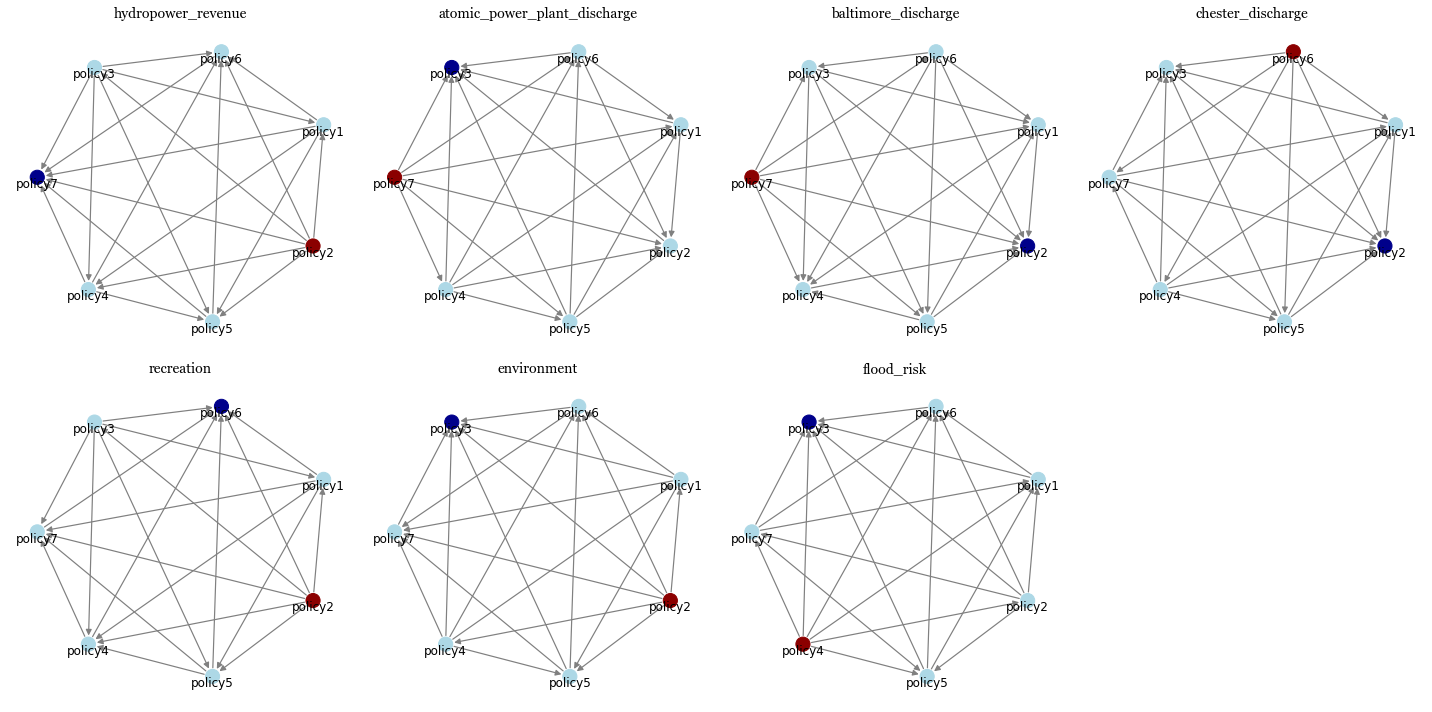

In [66]:
game.plot_aggregation(graphs, 'resultant', actors, fixedPositions=True)

####  2. Aggregate the preferences across all actors 

2 types of aggregation can be seen - 
- Cardinal resultant: The preference direction is weighted based on the incraese in cardinal utility of each node
- Resultant: The preference direction is weighted as 1 if there is any increase in utility. It gives the outcome of fallback bargaining by max(arrows_in-arrows_out) + min(least_preferred)

In [19]:
games = []
all_outcomes = []
for index, value in enumerate(baselines):
    #print(index)
    game = bargainingGames(payoffs, actors, value)
    game.set_parameters()
    games.append(game)
    all_outcomes.append(game.preference_direction(actors))

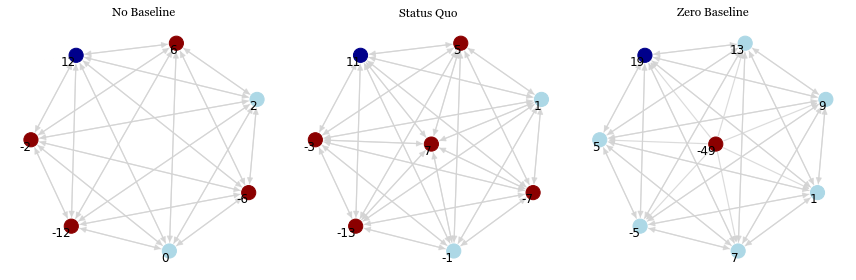

In [65]:
game.combined_graph(all_outcomes, 'resultant', games, baselines, fixedPositions = True)

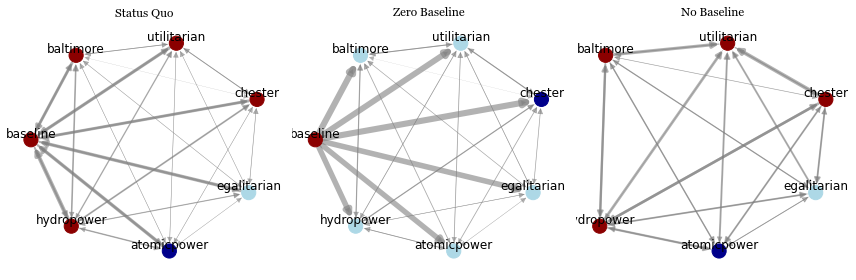

In [295]:
game.combined_graph(all_outcomes, 'cardinal_resultant', games, baselines, fixedPositions = True)